Source Position =  [0 0 0]
Neutron Direction = [-0.76037179 -0.56234254 -0.32497017]
Energy =  2.4702360086831776


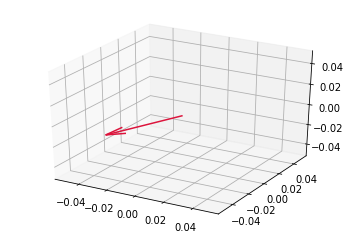

Approx. Energy [MeV] = 2.490432
Corresponding Cross Section [barns] =  24.03565
Distance Traveled = 1.493556172128519 cm.

Neutron Scattered. Sample new direction and energy.
New Energy is =  2.49304461620853 MeV.
New Direction =  [-0.76121157 -0.56296361 -0.32532908]
Approx. Energy [MeV] = 2.490432
Corresponding Cross Section [barns] =  24.03565
Distance Traveled = 1.652275857510656 cm.

Neutron Scattered. Sample new direction and energy.
New Energy is =  2.469814735506906 MeV.
New Direction =  [-0.76132062 -0.56304426 -0.32537568]
Approx. Energy [MeV] = 2.490432
Corresponding Cross Section [barns] =  24.03565
Distance Traveled = 0.03372699821762374 cm.

Neutron was captured and died.


In [196]:
import numpy as np
import matplotlib.pyplot as plt

# 1 Neutron History Simulation
LOUD = True
alive = True
###################################
### Step 1 ###
##################################
# Point Source
# Starts at [x,y,z] = [0,0,0]
source_pos = np.array([0,0,0])
if LOUD:
    print("Source Position = ", source_pos)

# Neutron Direction
# Sample phi
phi = np.random.uniform(0,2*np.pi)
# Sample cos theta
costheta = np.random.uniform(-1,1)

# Set direction
omegaz = costheta
omegax = np.sqrt(1 - omegaz**2)*np.cos(phi)
omegay = np.sqrt(1 - omegaz**2)*np.sin(phi)
direct = np.array([omegax,omegay,omegaz])
if LOUD:
    print("Neutron Direction =", direct)
        
# Sample Energy
pdf = lambda E: 0.4865*np.sinh(np.sqrt(2.249*E))*np.exp(-E/0.988)
big = pdf(0.74255)
rand_point = np.array([np.random.uniform(0,10),np.random.uniform(0,big)])
Accept = False
while Accept == False:
    rand_point = np.array([np.random.uniform(0,10),np.random.uniform(0,big)])
    if rand_point[1] < pdf(rand_point[0]):
        Accept = True
        if LOUD:
            print("Energy = ",rand_point[0])
    else: 
        Accept = False

from mpl_toolkits.mplot3d import Axes3D 
origin =[0,0,0]
X,Y,Z = zip(origin)
vector = [omegax,omegay,omegaz]
U,V,W = zip(vector)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.25,length=0.05,color='crimson')
plt.show()



###################################
##### Step 2 #####
###################################
while alive:
    # Transition Kernel
    from numpy import genfromtxt
    XSdata = genfromtxt('U235XSection.csv',delimiter=';')
    long = len(XSdata)
    E = round(rand_point[0],1)
    for l in range(long):
        if round(XSdata[l,0],1) == E:
            sigma = XSdata[l,1]
            if LOUD:
                print('Approx. Energy [MeV] =', XSdata[l,0])
                print("Corresponding Cross Section [barns] = ",sigma)
            break
    rho = 19.1
    NA = 6.022e23
    Nuclei = (rho*NA)/235.0439299
    Big_Sigma = Nuclei*sigma*1e-24
    mu = np.random.uniform(0,1)
    s = ((-1/Big_Sigma)*np.log(mu))
    if LOUD:
        print("Distance Traveled =",s,"cm.")

    ##############################
    ## Step 3 ##
    ###############################
    # Select nuclide for collision
    ''' For simplicity the only nuclide in my simulation is U-235'''

    ############################
    ## Step 4 ##
    ###########################
    ''' For simplicity sake I am going to ignore fission, and only have capture
    or scattering, and have each cross-section as 50% of the total'''
    Sigmas = 0.5*Big_Sigma
    Sigmac = 0.5*Big_Sigma
    p_scat = Sigmas/Big_Sigma
    p_cap = Sigmac/Big_Sigma
    rx = np.random.uniform(0,1)
    if rx < 0.5:
        print("\nNeutron was captured and died.")
        alive = False
    else:
        print("\nNeutron Scattered. Sample new direction and energy.")
        E = E*((235**2 + 2*235*np.cos(np.random.uniform(0,np.pi))+1)/(236)**2)
        print("New Energy is = ",E,"MeV.")
        direct = (direct*235 + direct)/(np.sqrt(235**2 + 2*235*np.cos(np.random.uniform(0,np.pi))+1))
        print("New Direction = ",direct)

## Fixed Source

Utilize Monte Carlo code with N_c = 10, N_b = 10, and 1000 particle histories per batch, we will compute the scalar flux and leakages at the outer boundaries for Eqs. (1a) and (1b) with Sigma_t = 1.0 $cm^-1$, Sigma_s = 0.5 $cm^-1$, Q = 1.0 $(p/cm-sec)$, x_B = 3.0 $cm$. Plot the scalar flux solution versus the analytic solution. Tabulate the scalar fluxes and half-range leakages, and their respective relative standard deviations. 

For  10 batches consisting of 1000 particles each: 

The average scalar flux for 1 to 10 batches: 
 [ 1.47070206  1.45766696  1.47905153  1.43513838  1.45220265  1.352056
  1.51490909  1.53383543  1.44742533  1.49126588]

 The scalar flux averaged over 10 batches is:
 1.46342533166

 The total leakage at the left boundary, x=0, for 1 to 10 batches: 
 [ 291.  276.  304.  272.  319.  272.  281.  300.  270.  295.]

 The total leakage at the left boundary averaged over 10 batches is:
 288.0

 The total leakage at the right boundary, x=3.0, for 1 to 10 batches: 
 [ 267.  257.  249.  275.  255.  258.  275.  265.  248.  272.]

 The total leakage at the right boundary averaged over 10 batches is:
 262.1

 The standard deviation for the scalar flux is: 0.0157405252833

 The standard deviation for the leakage at the left boundary is: 5.21536192416

 The standard deviation for the leakage at the right boundary is: 3.2091881978


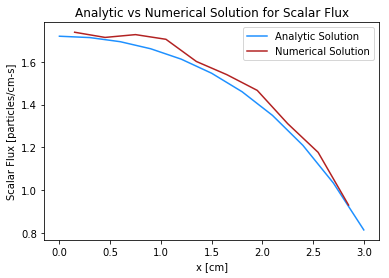

For  10 batches consisting of 100000 particles each: 

The average scalar flux for 1 to 10 batches: 
 [ 1.46427855  1.46826524  1.4631815   1.46123023  1.47278133  1.46245423
  1.46446214  1.45682909  1.47112802  1.46692669]

 The scalar flux averaged over 10 batches is:
 1.46515370023

 The total leakage at the left boundary, x=0, for 1 to 10 batches: 
 [ 28871.  28954.  28740.  28897.  29204.  28862.  28952.  28800.  29339.
  29110.]

 The total leakage at the left boundary averaged over 10 batches is:
 28972.9

 The total leakage at the right boundary, x=3.0, for 1 to 10 batches: 
 [ 26853.  26721.  26575.  26817.  26307.  26836.  26795.  26716.  26748.
  26761.]

 The total leakage at the right boundary averaged over 10 batches is:
 26712.9

 The standard deviation for the scalar flux is: 0.00150485157949

 The standard deviation for the leakage at the left boundary is: 59.5918432151

 The standard deviation for the leakage at the right boundary is: 51.6129720989


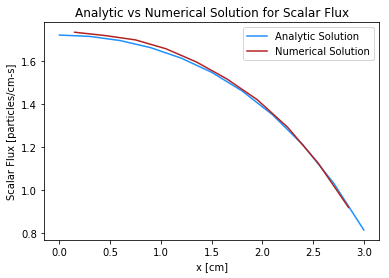

In [139]:
import numpy as np
import matplotlib.pyplot as plt

##############################################
## Analytic Solution ##
##############################################

# - - - - - - - - -
# Define Constants
# - - - - - - - - -

Sigmat = 1.0 # cm^-1
Sigmas = 0.5 # cm^-1
Sigmaa = Sigmat - Sigmas # cm^-1
Q = 1.0 # particles / cm-sec
x_B = 3.0 # cm
alpha = np.sqrt(Sigmaa*Sigmat)
a = -( (Sigmat*Q) / (Sigmaa*( Sigmat*np.cosh(alpha*x_B)+
                             alpha*np.sinh(alpha*x_B) )) )
# - - - - - - - - 
# Define x values
# - - - - - - - -
x = np.linspace(0, x_B, 11)

# - - - - - - - - - - - -
# Analytic Flux Function
# - - - - - - - - - - - -
analy_solution = np.zeros(len(x))
phi_analy = lambda x: a * np.cosh(alpha*x) + Q/Sigmaa

# - - - - - - - - - - - - - - - - - -
# Solve Analytic Flux at each x value
# - - - - - - - - - - - - - - - - - -
counter = 0
for i in x:
    analy_solution[counter] = phi_analy(i)
    counter += 1
    
###############################################
## Monte Carlo Method ##
###############################################

# - - - - - - - - -
# Define Constants
# - - - - - - - - -
Nc = 10 # Number of Cells
Nb = 10 # Number of Batches
N = [1000,100000] # Particles per batch
P_abs = Sigmaa/Sigmat # Probability of Absorption in Slab

# - - - - - - - 
# Create x slab
# - - - - - - -
delta_x = x_B/Nc
X = np.linspace(0,x_B,x_B/delta_x + 1) # Cell Edges
Xc = np.linspace(delta_x*0.5,x_B-0.5*delta_x,Nc) # Cell centers

# - - - - - - - - - - - - - -
# Initialize values to Solve
# - - - - - - - - - - - - - -
phi_avg = np.zeros(Nb)
leakage_R_avg = np.zeros(Nb)
leakage_L_avg = np.zeros(Nb)
phi_avg_squared = np.zeros(Nb)
leakage_R_avg_squared = np.zeros(Nb)
leakage_L_avg_squared = np.zeros(Nb)

# - - - - - - - - - - - - - - - - -
# Solving using Monte Carlo Method
# - - - - - - - - - - - - - - - - -
#Used for printing variables to check code
loud = 0 
if loud:
    print("X:",X)
# Solve for Nb number of batches
for k in range(2):
    for i in range(Nb):
        # Zero values for each batch run
        phi = np.zeros(Nc)
        leakage_R = 0.0
        leakage_L = 0.0
        # Particle Histories
        for j in range(N[k]):
            # Use pseudorandom number to pick starting position
            Rpos = np.random.uniform(0,1)
            x_start = x_B*Rpos
            if loud:
                print("x_start:",x_start)
            # Determine what cell particle is in
            if x_start < X[1]:
                cell = 1
            elif X[1] < x_start < X[2]:
                cell = 2
            elif X[2] < x_start < X[3]:
                cell = 3
            elif X[3] < x_start < X[4]:
                cell = 4
            elif X[4] < x_start < X[5]:
                cell = 5
            elif X[5] < x_start < X[6]:
                cell = 6
            elif X[6] < x_start < X[7]:
                cell = 7
            elif X[7] < x_start < X[8]:
                cell = 8
            elif X[8] < x_start < X[9]:
                cell = 9
            else:
                cell = 10
            if loud:
                print("cell:",cell)
            # use pseudorandom number to pick particle dir
            Rdir = np.random.uniform(0,1)
            # if Rdir is greater than 0.5, + direction
            if Rdir >= 0.5:
                mu = 1
            # else particle going in - direction
            else:
                mu = -1
            if loud:
                print("mu:",mu)
            # While particle hasn't leaked or been absorbed
            alive = 1
            while alive == 1:
                # Path length of particle
                Rpl = np.random.uniform(0,1)
                # sampling of distance to collision
                s = (-1/Sigmat)*np.log(1-Rpl)
                if loud:
                    print("s:",s)
                # Distance to cell edge
                # Right edge of cell
                if (mu>0.0):
                    edge = cell*delta_x-x_start
                # Left edge of cell
                else:
                    edge = x_start - (cell-1)*delta_x
                if loud:
                    print("edge:",edge)
                if edge < s:
                    #Tally flux for distance to cell edge
                    s = edge
                    phi[cell-1] += ((s/delta_x)/N[k]) * x_B
                    collision = 0
                    # Set particle start at new location
                    x_start = x_start + s*mu + 1.0e-6*mu
                    # Check to see if particle leaked
                    # Check Right boundary
                    if x_start >= x_B:
                        leakage_R += 1
                        alive = 0
                    # Check Left boundary
                    elif x_start <= 0.0:
                        leakage_L += 1
                        x_start = 0
                        mu =  1
                    else:
                        if x_start < X[1]:
                            cell = 1
                        elif X[1] < x_start < X[2]:
                            cell = 2
                        elif X[2] < x_start < X[3]:
                            cell = 3
                        elif X[3] < x_start < X[4]:
                            cell = 4
                        elif X[4] < x_start < X[5]:
                            cell = 5
                        elif X[5] < x_start < X[6]:
                            cell = 6
                        elif X[6] < x_start < X[7]:
                            cell = 7
                        elif X[7] < x_start < X[8]:
                            cell = 8
                        elif X[8] < x_start < X[9]:
                            cell = 9
                        else:
                            cell = 10
                        if loud:
                            print("cell:",cell)
                else:
                    collision = 1
                    # Tally Flux in cell
                    phi[cell-1] += ((s/delta_x)/N[k]) * x_B
                    # Psuedorandom number for prob of Abs.
                    Rabs = np.random.uniform(0,1)
                    if Rabs < P_abs:
                        # Particle gets absorbed
                        alive = 0
                        if loud:
                            print("Particle absorbed")
                    # If it isn't absorbed, it scatters
                    else:
                    # Psuedorandom number for direction it scatters in
                        Rscat = np.random.uniform(0,1)
                        if loud:
                            print("Particle scattered")
                        # Scatters to the right
                        if Rscat > 0.5:
                            mu = 1
                        # Scatters to the left
                        else:
                            mu = -1
        
        # Calculate the Average Flux,Eq.(16) Lec 20
        phi_avg[i] = np.sum(phi)/Nc
        leakage_R_avg[i] = leakage_R
        leakage_L_avg[i] = leakage_L
        # Average flux squared (g^2 from lecture 20)
        phi_avg_squared[i] = (np.sum(phi)/Nb)**2
        leakage_R_avg_squared[i] = leakage_R**2
        leakage_L_avg_squared[i] = leakage_L**2

    # Average values over all batches
    g_phi = np.sum(phi_avg)/Nb
    g_leakage_R = np.sum(leakage_R_avg)/Nb
    g_leakage_L = np.sum(leakage_L_avg)/Nb
    g_phi_squared = np.sum(phi_avg_squared)/Nb
    g_leakage_R_squared = np.sum(leakage_R_avg_squared)/Nb
    g_leakage_L_squared = np.sum(leakage_L_avg_squared)/Nb
    std_phi = np.sqrt(np.abs(g_phi**2 - g_phi_squared)) / np.sqrt(Nb-1)
    std_leakage_R = np.sqrt(np.abs(g_leakage_R**2 - g_leakage_R_squared))/np.sqrt(Nb-1)
    std_leakage_L = np.sqrt(np.abs(g_leakage_L**2 - g_leakage_L_squared))/np.sqrt(Nb-1)

    
    
    # - - - - - - -
    # Print Results
    # - - - - - - -
    print("For ",Nb,"batches consisting of",N[k],"particles each: \n")
    print("The average scalar flux for 1 to",Nb,"batches: \n",phi_avg)
    print("\n The scalar flux averaged over",Nb,"batches is:\n",g_phi)
    print("\n The total leakage at the left boundary, x=0, for 1 to",Nb,"batches: \n",leakage_L_avg)
    print("\n The total leakage at the left boundary averaged over",Nb,"batches is:\n",g_leakage_L)
    print("\n The total leakage at the right boundary, x=3.0, for 1 to",Nb,"batches: \n",leakage_R_avg)
    print("\n The total leakage at the right boundary averaged over",Nb,"batches is:\n",g_leakage_R)
    print("\n The standard deviation for the scalar flux is:",std_phi)
    print("\n The standard deviation for the leakage at the left boundary is:",std_leakage_L)
    print("\n The standard deviation for the leakage at the right boundary is:",std_leakage_R)

    ###############################################
    # Plotting Numerical vs Analytic Solutions
    ##############################################
    plt.plot(x,analy_solution,color="dodgerblue",label="Analytic Solution")
    plt.plot(Xc,phi,color="firebrick",label="Numerical Solution")
    plt.xlabel("x [cm]")
    plt.ylabel("Scalar Flux [particles/cm-s]")
    plt.legend()
    plt.title("Analytic vs Numerical Solution for Scalar Flux")
    plt.show()

The block of code above solves for the scalar flux in a slab reactor using an analytic solution and a numerical solution calculated using the Monte Carlo method. The slab ranged from x=0.0 to x=3.0, divided into 10 cells. Although the problem statement called for 10 batches of 1000 particles each, I had extra time so I also did 10 batches of 100,000 particles each. As expected the error decreased by a factor of the square root of N, and the numerical solution for the scalar flux much more closely resembled the analytical solution for the scalar flux. We also see that the leakages at both boundaries and the average scalar flux scales up similarly as expected. The tabulated values show the average flux and leakage for the left and right boundaries for each batch. The leakage at the left boundary is greater than the leakage at the right boundary as expected due to the left boundary's reflective boundary condition, since the reflected neutrons have a greater chance of scattering back toward the boundary again.  

Perform a second calculation with N_c = 10 and N_b = 1000 with 1 particle history per batch. The sequence of pseudo random numbers used in the first calculations should also be used in the second calculation. Compare your scalar fluxes and leakages, and their respective relative standard deviations with thsoe from the first calculation. Explain your results. 

For  10000 batches consisting of 1 particles each: 

The average scalar flux for 1 to 10000 batches: 
 [ 1.03392787  3.01671588  0.80954699 ...,  0.35039825  0.40187317
  1.58781906]

 The scalar flux averaged over 10000 batches is:
 1.45257776409

 The total leakage at the left boundary, x=0, for 1 to 10000 batches: 
 [ 0.  0.  0. ...,  0.  0.  1.]

 The total leakage at the left boundary averaged over 10000 batches is:
 0.2857

 The total leakage at the right boundary, x=3.0, for 1 to 10000 batches: 
 [ 0.  1.  0. ...,  0.  0.  0.]

 The total leakage at the right boundary averaged over 10000 batches is:
 0.268

 The standard deviation for the scalar flux is: 0.0145264897432

 The standard deviation for the leakage at the left boundary is: 0.0057957665663

 The standard deviation for the leakage at the right boundary is: 0.00442939747101


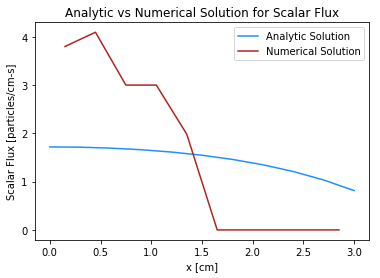

In [200]:
##############################################
## Analytic Solution ##
##############################################

# - - - - - - - - -
# Define Constants
# - - - - - - - - -

Sigmat = 1.0 # cm^-1
Sigmas = 0.5 # cm^-1
Sigmaa = Sigmat - Sigmas # cm^-1
Q = 1.0 # particles / cm-sec
x_B = 3.0 # cm
alpha = np.sqrt(Sigmaa*Sigmat)
a = -( (Sigmat*Q) / (Sigmaa*( Sigmat*np.cosh(alpha*x_B)+
                             alpha*np.sinh(alpha*x_B) )) )
# - - - - - - - - 
# Define x values
# - - - - - - - -
x = np.linspace(0, x_B, 11)

# - - - - - - - - - - - -
# Analytic Flux Function
# - - - - - - - - - - - -
analy_solution = np.zeros(len(x))
phi_analy = lambda x: a * np.cosh(alpha*x) + Q/Sigmaa

# - - - - - - - - - - - - - - - - - -
# Solve Analytic Flux at each x value
# - - - - - - - - - - - - - - - - - -
counter = 0
for i in x:
    analy_solution[counter] = phi_analy(i)
    counter += 1
    
###############################################
## Monte Carlo Method ##
###############################################

# - - - - - - - - -
# Define Constants
# - - - - - - - - -
Nc = 10 # Number of Cells
Nb = 10000 # Number of Batches
N = [1] # Particles per batch
P_abs = Sigmaa/Sigmat # Probability of Absorption in Slab

# - - - - - - - 
# Create x slab
# - - - - - - -
delta_x = x_B/Nc
X = np.linspace(0,x_B,x_B/delta_x + 1) # Cell Edges
Xc = np.linspace(delta_x*0.5,x_B-0.5*delta_x,Nc) # Cell centers

# - - - - - - - - - - - - - -
# Initialize values to Solve
# - - - - - - - - - - - - - -
phi_avg = np.zeros(Nb)
leakage_R_avg = np.zeros(Nb)
leakage_L_avg = np.zeros(Nb)
phi_avg_squared = np.zeros(Nb)
leakage_R_avg_squared = np.zeros(Nb)
leakage_L_avg_squared = np.zeros(Nb)

# - - - - - - - - - - - - - - - - -
# Solving using Monte Carlo Method
# - - - - - - - - - - - - - - - - -
#Used for printing variables to check code
loud = 0 
if loud:
    print("X:",X)
# Solve for Nb number of batches
for k in range(1):
    for i in range(Nb):
        # Zero values for each batch run
        phi = np.zeros(Nc)
        leakage_R = 0.0
        leakage_L = 0.0
        # Particle Histories
        for j in range(N[k]):
            # Use pseudorandom number to pick starting position
            Rpos = np.random.uniform(0,1)
            x_start = x_B*Rpos
            if loud:
                print("x_start:",x_start)
            # Determine what cell particle is in
            if x_start < X[1]:
                cell = 1
            elif X[1] < x_start < X[2]:
                cell = 2
            elif X[2] < x_start < X[3]:
                cell = 3
            elif X[3] < x_start < X[4]:
                cell = 4
            elif X[4] < x_start < X[5]:
                cell = 5
            elif X[5] < x_start < X[6]:
                cell = 6
            elif X[6] < x_start < X[7]:
                cell = 7
            elif X[7] < x_start < X[8]:
                cell = 8
            elif X[8] < x_start < X[9]:
                cell = 9
            else:
                cell = 10
            if loud:
                print("cell:",cell)
            # use pseudorandom number to pick particle dir
            Rdir = np.random.uniform(0,1)
            # if Rdir is greater than 0.5, + direction
            if Rdir >= 0.5:
                mu = 1
            # else particle going in - direction
            else:
                mu = -1
            if loud:
                print("mu:",mu)
            # While particle hasn't leaked or been absorbed
            alive = 1
            while alive == 1:
                # Path length of particle
                Rpl = np.random.uniform(0,1)
                # sampling of distance to collision
                s = (-1/Sigmat)*np.log(1-Rpl)
                if loud:
                    print("s:",s)
                # Distance to cell edge
                # Right edge of cell
                if (mu>0.0):
                    edge = cell*delta_x-x_start
                # Left edge of cell
                else:
                    edge = x_start - (cell-1)*delta_x
                if loud:
                    print("edge:",edge)
                if edge < s:
                    #Tally flux for distance to cell edge
                    s = edge
                    phi[cell-1] += ((s/delta_x)/N[k]) * x_B
                    collision = 0
                    # Set particle start at new location
                    x_start = x_start + s*mu + 1.0e-6*mu
                    # Check to see if particle leaked
                    # Check Right boundary
                    if x_start >= x_B:
                        leakage_R += 1
                        alive = 0
                    # Check Left boundary
                    elif x_start <= 0.0:
                        leakage_L += 1
                        x_start = 0
                        mu =  1
                    else:
                        if x_start < X[1]:
                            cell = 1
                        elif X[1] < x_start < X[2]:
                            cell = 2
                        elif X[2] < x_start < X[3]:
                            cell = 3
                        elif X[3] < x_start < X[4]:
                            cell = 4
                        elif X[4] < x_start < X[5]:
                            cell = 5
                        elif X[5] < x_start < X[6]:
                            cell = 6
                        elif X[6] < x_start < X[7]:
                            cell = 7
                        elif X[7] < x_start < X[8]:
                            cell = 8
                        elif X[8] < x_start < X[9]:
                            cell = 9
                        else:
                            cell = 10
                        if loud:
                            print("cell:",cell)
                else:
                    collision = 1
                    # Tally Flux in cell
                    phi[cell-1] += ((s/delta_x)/N[k]) * x_B
                    # Psuedorandom number for prob of Abs.
                    Rabs = np.random.uniform(0,1)
                    if Rabs < P_abs:
                        # Particle gets absorbed
                        alive = 0
                        if loud:
                            print("Particle absorbed")
                    # If it isn't absorbed, it scatters
                    else:
                    # Psuedorandom number for direction it scatters in
                        Rscat = np.random.uniform(0,1)
                        if loud:
                            print("Particle scattered")
                        # Scatters to the right
                        if Rscat > 0.5:
                            mu = 1
                        # Scatters to the left
                        else:
                            mu = -1
        
        # Calculate the Average Flux,Eq.(16) Lec 20
        phi_avg[i] = np.sum(phi)/Nc
        leakage_R_avg[i] = leakage_R
        leakage_L_avg[i] = leakage_L
        # Average flux squared (g^2 from lecture 20)
        phi_avg_squared[i] = (np.sum(phi)/Nb)**2
        leakage_R_avg_squared[i] = leakage_R**2
        leakage_L_avg_squared[i] = leakage_L**2

    # Average values over all batches
    g_phi = np.sum(phi_avg)/Nb
    g_leakage_R = np.sum(leakage_R_avg)/Nb
    g_leakage_L = np.sum(leakage_L_avg)/Nb
    g_phi_squared = np.sum(phi_avg_squared)/Nb
    g_leakage_R_squared = np.sum(leakage_R_avg_squared)/Nb
    g_leakage_L_squared = np.sum(leakage_L_avg_squared)/Nb
    std_phi = np.sqrt(np.abs(g_phi**2 - g_phi_squared)) / np.sqrt(Nb-1)
    std_leakage_R = np.sqrt(np.abs(g_leakage_R**2 - g_leakage_R_squared))/np.sqrt(Nb-1)
    std_leakage_L = np.sqrt(np.abs(g_leakage_L**2 - g_leakage_L_squared))/np.sqrt(Nb-1)

    
    
    # - - - - - - -
    # Print Results
    # - - - - - - -
    print("For ",Nb,"batches consisting of",N[k],"particles each: \n")
    print("The average scalar flux for 1 to",Nb,"batches: \n",phi_avg)
    print("\n The scalar flux averaged over",Nb,"batches is:\n",g_phi)
    print("\n The total leakage at the left boundary, x=0, for 1 to",Nb,"batches: \n",leakage_L_avg)
    print("\n The total leakage at the left boundary averaged over",Nb,"batches is:\n",g_leakage_L)
    print("\n The total leakage at the right boundary, x=3.0, for 1 to",Nb,"batches: \n",leakage_R_avg)
    print("\n The total leakage at the right boundary averaged over",Nb,"batches is:\n",g_leakage_R)
    print("\n The standard deviation for the scalar flux is:",std_phi)
    print("\n The standard deviation for the leakage at the left boundary is:",std_leakage_L)
    print("\n The standard deviation for the leakage at the right boundary is:",std_leakage_R)

    ###############################################
    # Plotting Numerical vs Analytic Solutions
    ##############################################
    plt.plot(x,analy_solution,color="dodgerblue",label="Analytic Solution")
    plt.plot(Xc,phi,color="firebrick",label="Numerical Solution")
    plt.xlabel("x [cm]")
    plt.ylabel("Scalar Flux [particles/cm-s]")
    plt.legend()
    plt.title("Analytic vs Numerical Solution for Scalar Flux")
    plt.show()

For this simulation we see that the scalar flux has an average value similar to that of the first calculation. In addition the leakage ratios and the standard deviations are also similar if scaled up to the first results for N=1000, since in effect each simulation has 10,000 particle simulated, 10,000 batches of 1 particle or 10 batches of 1000 particles. The plot of the numerical and analytical solution however is very haphazard since only one neutron is being plotted through the system. 